# Data Clean up

Haytham Mohamed - INFS890 Spring 2020

This notebook is to clean orders flow data

In [506]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime
from scipy import stats

sns.set()
sns.set(color_codes=True)
#sns.set_color_codes()

pd.options.display.max_rows = 15
pd.options.display.float_format = '{:,.4f}'.format

# Read the raw data. 

All data is in one file, where each metric is listed under each other with three columns: 

1- metric: The name of the metric

2- date: the data and time of the metric

3- value: the metric value


In [507]:
# 1- read processed file

home_dir = '/Users/hmohamed/github/data-research-spring2020/sock-shop'

file_dir = home_dir + '/processed-data/'
input_file = 'orders_flow_data.csv'

SAVE = False

In [508]:
def read_df(file_dir, data_file):
    df = pd.read_csv(file_dir + data_file)
    return to_time_series(df)

def to_time_series(df, index_col_name='date'):
    df[index_col_name] = pd.to_datetime(df[index_col_name])
    df.set_index(index_col_name, inplace=True)
    df.sort_index(inplace=True)
    return df
    

In [509]:
orders_flow_df = read_df(file_dir, input_file)
orders_flow_df.head(5) 

,front-end_cpu_use,orders_cpu_use,orders-db_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,front-end_pods,orders_pods,user_pods,shipping_pods,payment_pods,carts_pods,nodes_cpu_use,orders_req,orders_ltcy
date,,,,,,,,,,,,,,,,,,
2020-03-26 19:46:22,0.0300,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0300,0.0700,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.5000,0.1500,0.2400
2020-03-26 19:46:37,0.0600,0.0200,0.0200,0.0200,0.0200,0.0100,0.0100,0.1800,0.1800,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.8900,0.1500,0.2400
2020-03-26 19:46:52,0.0700,0.0300,0.0200,0.0300,0.0200,0.0100,0.0100,0.4400,0.2000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.3500,0.1500,0.2400
2020-03-26 19:47:07,0.0700,0.0300,0.0200,0.0200,0.0200,0.0100,0.0100,0.2300,0.1700,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.2600,0.1300,0.2400
2020-03-26 19:47:22,0.0700,0.0200,0.0100,0.0200,0.0200,0.0100,0.0100,0.2400,0.1400,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.2800,0.3600,0.2400


In [510]:
orders_flow_df.shape


(6766, 18)

# Check nulls and zero in Latency

Take away records with ltcy or number of pods null or equals to zero

In [511]:
orders_flow_df = orders_flow_df[orders_flow_df['orders_ltcy'].notna()]
orders_flow_df.shape

(6766, 18)

In [512]:
orders_flow_df = orders_flow_df[orders_flow_df['orders_ltcy'] >= 0]
orders_flow_df.shape

(6766, 18)

In [513]:
orders_flow_df.describe(include="all")

,front-end_cpu_use,orders_cpu_use,orders-db_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,front-end_pods,orders_pods,user_pods,shipping_pods,payment_pods,carts_pods,nodes_cpu_use,orders_req,orders_ltcy
count,"6,766.0000","6,766.0000","6,766.0000","6,766.0000","6,766.0000","6,766.0000","6,766.0000","6,766.0000","6,766.0000","6,766.0000","6,766.0000","6,766.0000","6,766.0000","6,766.0000","6,766.0000","6,766.0000","6,766.0000","6,766.0000"
mean,0.8273,0.2116,0.0202,0.1991,0.1194,0.0523,0.0318,0.5306,1.8280,2.7575,2.7613,2.7613,2.7613,2.7613,2.7613,4.1043,5.0330,2.9729
std,0.6170,0.1319,0.0049,0.1350,0.0804,0.0443,0.0122,0.5758,1.9903,1.0979,1.0924,1.0924,1.0924,1.0924,1.0924,2.0826,4.2009,3.5143
min,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0300,0.0100,0.5000,1.0000,1.0000,1.0000,1.0000,1.0000,1.1000,0.0000,0.0200
25%,0.1900,0.0800,0.0200,0.0500,0.0300,0.0400,0.0200,0.1200,0.0200,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,1.9200,0.4900,0.2400
50%,0.8400,0.2200,0.0200,0.2000,0.1200,0.0500,0.0300,0.3200,1.1550,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,4.2100,5.1450,0.4900
75%,1.2900,0.3000,0.0200,0.3000,0.1800,0.0600,0.0400,0.5800,3.2800,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,5.7800,8.1950,5.8090
max,2.7300,0.9100,0.0400,0.6400,0.3400,0.6300,0.1000,2.5300,6.5800,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,9.6600,20.1300,9.7500


# Check missing values

In [514]:
# percent of missing value for every feature
orders_flow_df.isnull().sum() * 100 / orders_flow_df.shape[0]

front-end_cpu_use   0.0000
orders_cpu_use      0.0000
orders-db_cpu_use   0.0000
user_cpu_use        0.0000
user-db_cpu_use     0.0000
                     ...  
payment_pods        0.0000
carts_pods          0.0000
nodes_cpu_use       0.0000
orders_req          0.0000
orders_ltcy         0.0000
Length: 18, dtype: float64

# Check Outliers

### latency target 

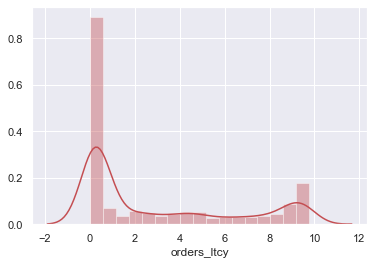

In [515]:
sns.distplot(orders_flow_df['orders_ltcy'], hist=True, rug=False, color="r", label='ltcy')

request rate quantiles min 10.996000000000004 max 0.0
latency quantiles min 0.02 max 1.5459999999999947


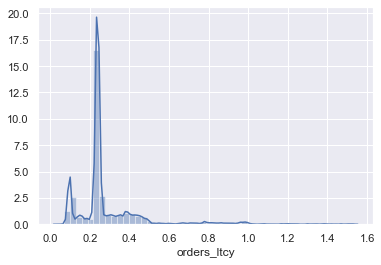

In [516]:
# taking percentile out (between lower and upper limit)
# looks like first half of latency is between 0.24 and 1.361, the other half is 2 and up to 9.7
# acceptable outliers in services latency, I'll consider it. so take all data (0 to 100%)
# i.e. not to trim any portion from either edges

    
df2 = orders_flow_df    
# request rate
if 1 == 1:
    minq = df2['orders_req'].quantile(.2)  # .2
    maxq = df2['orders_req'].quantile(.92)  # .92
    print('request rate quantiles min {} max {}'.format(maxq, minq))
    df2 = df2[df2['orders_req'] > minq]
    df2 = df2[df2['orders_req'] < maxq]
    #sns.distplot(df2['orders_req'])
    
# latency
if 1 == 1:
    minq = df2['orders_ltcy'].quantile(0)    # 0
    maxq = df2['orders_ltcy'].quantile(.7)   # .7
    print('latency quantiles min {} max {}'.format(minq, maxq))
    df2 = df2[df2['orders_ltcy'] > minq]
    df2 = df2[df2['orders_ltcy'] < maxq]
    sns.distplot(df2['orders_ltcy'])


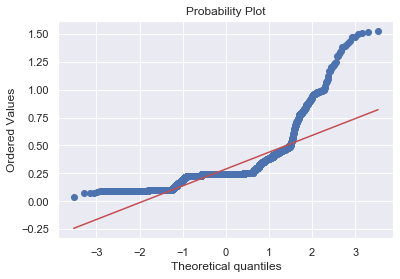

In [517]:
stats.probplot(df2['orders_ltcy'], plot=plt)
plt.show()

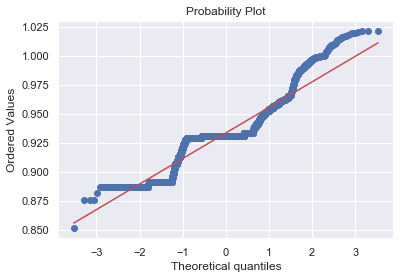

In [518]:
# transformation to normalize .. helpful to check here before the second file the pipeline
ltcy = df2['orders_ltcy']
ltcy = np.power(ltcy, 0.05)      # do nothing for now
stats.probplot(ltcy, plot=plt)
plt.show()

The scaled latency distribution shows now an exponential graph. Taking the log and plotting it would remedy the skewness.

In [519]:
df2['orders_ltcy'] = ltcy


In [520]:
df2.describe(include="all")

,front-end_cpu_use,orders_cpu_use,orders-db_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,front-end_pods,orders_pods,user_pods,shipping_pods,payment_pods,carts_pods,nodes_cpu_use,orders_req,orders_ltcy
count,"3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000"
mean,0.8164,0.2130,0.0193,0.1952,0.1173,0.0488,0.0271,0.3956,1.9091,2.2321,2.2337,2.2337,2.2337,2.2337,2.2337,4.1628,4.9498,0.9335
std,0.4204,0.0981,0.0048,0.1054,0.0620,0.0304,0.0123,0.3415,1.5816,0.9905,0.9893,0.9893,0.9893,0.9893,0.9893,1.4865,2.8782,0.0237
min,0.0300,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0300,0.0100,0.5000,1.0000,1.0000,1.0000,1.0000,1.0000,1.1000,0.0200,0.8513
25%,0.5100,0.1400,0.0200,0.1100,0.0700,0.0300,0.0200,0.2000,0.3400,1.6250,2.0000,2.0000,2.0000,2.0000,2.0000,3.0000,2.3800,0.9292
50%,0.8200,0.2100,0.0200,0.1900,0.1100,0.0500,0.0300,0.2900,1.7200,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,4.1100,5.0900,0.9311
75%,1.0900,0.2800,0.0200,0.2600,0.1600,0.0600,0.0300,0.4175,3.2000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,5.1800,7.3600,0.9383
max,2.4600,0.9100,0.0300,0.5500,0.3000,0.6300,0.0900,2.2800,6.3100,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,8.7900,10.9800,1.0215


In [521]:
orders_flow_df = df2
if SAVE:
    processed_file_path = file_dir + 'order_flow_cleanup_data.csv'
    orders_flow_df.to_csv(path_or_buf=processed_file_path, index=True)
    
orders_flow_df.head(5)    

,front-end_cpu_use,orders_cpu_use,orders-db_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,front-end_pods,orders_pods,user_pods,shipping_pods,payment_pods,carts_pods,nodes_cpu_use,orders_req,orders_ltcy
date,,,,,,,,,,,,,,,,,,
2020-03-26 19:46:22,0.0300,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0300,0.0700,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.5000,0.1500,0.9311
2020-03-26 19:46:37,0.0600,0.0200,0.0200,0.0200,0.0200,0.0100,0.0100,0.1800,0.1800,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.8900,0.1500,0.9311
2020-03-26 19:46:52,0.0700,0.0300,0.0200,0.0300,0.0200,0.0100,0.0100,0.4400,0.2000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.3500,0.1500,0.9311
2020-03-26 19:47:07,0.0700,0.0300,0.0200,0.0200,0.0200,0.0100,0.0100,0.2300,0.1700,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.2600,0.1300,0.9311
2020-03-26 19:47:22,0.0700,0.0200,0.0100,0.0200,0.0200,0.0100,0.0100,0.2400,0.1400,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.2800,0.3600,0.9311
